<a href="https://colab.research.google.com/github/UliksSekiraqa/StockMarketAnalysis/blob/master/yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading

In [ ]:
!pip install yfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [ ]:

#Function for getting a specified country's stock data
def stock(ticker):
    country_stock = yf.Ticker(ticker).history(period="1y")
    country_stock_close = country_stock[['Close']]
    return country_stock_close

#Storing stock indices data of USA, UK, Japan, Germany, China, Europe
stock_usa1 = stock("^GSPC")        #S&P500
stock_usa2 = stock("^IXIC")        #NASDAQ
stock_usa3 = stock("^DJI")         #DowJones
stock_uk = stock("^FTSE")          #FTSE100
stock_japan = stock("^N225")       #Nikkei225
stock_germany = stock("^GDAXI")    #Dax
stock_china = stock("000001.ss")   #SSE
stock_europe = stock("^STOXX50E")  #EuroStoxx50 

#Pulling covid data from WHO using pandas read_csv module
covid_data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

covid_data = covid_data[["Date_reported", " Country", " New_cases"]]
covid_global = covid_data.groupby(["Date_reported"]).sum()

#Function for getting a specified country's covid data    
def covid(country):
    is_country = covid_data[' Country']== country
    covid_data_country = covid_data[is_country]
    return covid_data_country

#Storing covid data of USA, UK, Japan, Germany, China and globally
covid_usa = covid("United States of America")
covid_uk = covid("The United Kingdom")
covid_japan = covid("Japan")
covid_germany = covid("Germany")
covid_china = covid("China")

# print("Global Covid Data")
# print(40*'-')
# print(covid_global)
# print(40*'-')

# print("USA Covid Data")
# print(covid_usa)
# print("UK Covid Data")
# print(covid_uk)
# print("Japan Covid Data")
# print(covid_japan)
# print("Germany Covid Data")
# print(covid_germany)
# print("China Covid Data")
# print(covid_china)



### Data Cleaning

In [ ]:
 #Checking if there are Nan values in stock indices and covid data

print("For sp500:    " + str(stock_usa1.isnull().values.any()))
print("For nasdaq:   " + str(stock_usa2.isnull().values.any()))
print("For dowjones: " + str(stock_usa3.isnull().values.any()))
print("For ftse100:  " + str(stock_uk.isnull().values.any()))
print("For dax:      " + str(stock_germany.isnull().values.any()))
print("For nikkei:   " + str(stock_japan.isnull().values.any()))
print("For SSE:      " + str(stock_china.isnull().values.any()))
print("For covid:    " + str(covid_data.isnull().values.any()))

For sp500:    False
For nasdaq:   False
For dowjones: False
For ftse100:  False
For dax:      False
For nikkei:   False
For SSE:      False
For covid:    False


In [ ]:
# Checking for duplicate records
print(25*'-')
print("No of Duplicate Records: ")
print(25*'-')
print("For sp500:    " + str(stock_usa1.duplicated().any()))
print("For nasdaq:   " + str(stock_usa2.duplicated().any()))
print("For dowjones: " + str(stock_usa3.duplicated().any()))
print("For ftse:     " + str(stock_uk.duplicated().any()))
print("For dax:      " + str(stock_germany.duplicated().any()))
print("For nikkei:   " + str(stock_japan.duplicated().any()))
print("For SSE:      " + str(stock_china.duplicated().any()))
print("For covid:    " + str(covid_data.duplicated().any()))
print(25*'-')

-------------------------
No of Duplicate Records: 
-------------------------
For sp500:    False
For nasdaq:   False
For dowjones: True
For ftse:     True
For dax:      False
For nikkei:   False
For SSE:      True
For covid:    False
-------------------------


In [ ]:
# Dropping the duplicate records (for dowjones, ftse, SSE)

print("Number of records before and after dropping the duplicates")
print(70*'-')

print("Before (dowjones): " + str(len(stock_usa3)))
stock_usa3 = stock_usa3.drop_duplicates()
print("After (dowjones):  " + str(len(stock_usa3)))

print("Before (ftse):     " + str(len(stock_uk)))
stock_uk = stock_uk.drop_duplicates()
print("After (ftse):      " + str(len(stock_uk)))

print("Before (SSE):      " + str(len(stock_china)))
stock_china = stock_china.drop_duplicates()
print("After (SSE):       " + str(len(stock_china)))

Number of records before and after dropping the duplicates
----------------------------------------------------------------------
Before (dowjones): 254
After (dowjones):  253
Before (ftse):     255
After (ftse):      252
Before (SSE):      243
After (SSE):       240


Text(0, 0.5, 'No. of Cases')

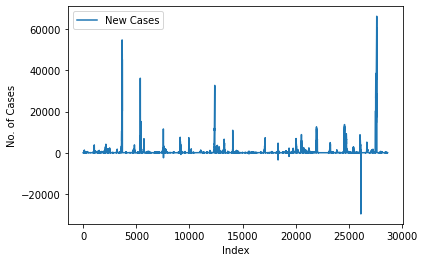

In [ ]:
#Plotting covid data to check for negative values

plt.plot(covid_data.index, covid_data[" New_cases"], label = "New Cases")
plt.legend()
plt.xlabel("Index")
plt.ylabel("No. of Cases")


#The plot shows that there are negative values in the no.of cases which needs to be cleaned

Text(0, 0.5, 'No. of Cases')

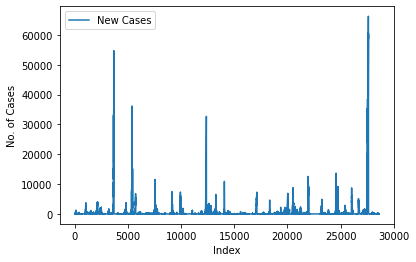

In [ ]:
#Replacing negative values to 0

for i in covid_data[" New_cases"]:
    if (i<0):
        covid_data[" New_cases"] = covid_data[" New_cases"].replace(i, 0)


#Plotting the cleaned data
plt.plot(covid_data.index, covid_data[" New_cases"], label="New Cases")
plt.legend()
plt.xlabel("Index")
plt.ylabel("No. of Cases")


### Data Merging

In [ ]:
# Changing the column name "Close"
stock_usa1 = stock_usa1.rename(columns={"Close": "S&P500"})
stock_usa2 = stock_usa2.rename(columns={"Close": "Nasdaq"})
stock_usa3 = stock_usa3.rename(columns={"Close": "DowJones"})
stock_uk = stock_uk.rename(columns={"Close": "Ftse100"})
stock_germany = stock_germany.rename(columns={"Close": "DAX"})
stock_japan = stock_japan.rename(columns={"Close": "Nikkei225"})
stock_china = stock_china.rename(columns={"Close": "SSE"})

#Moving the date to index for covid data
covid_data.index = covid_data["Date_reported"]
covid_data = covid_data [[" Country", " New_cases"]]
covid_usa = covid("United States of America")
covid_uk = covid("The United Kingdom")
covid_japan = covid("Japan")
covid_germany = covid("Germany")
covid_china = covid("China")

#Changing the column name Country to its respective country name

covid_usa = covid_usa.rename(columns={" New_cases": "USA_cases"})
covid_uk = covid_uk.rename(columns={" New_cases": "UK_cases"})
covid_japan = covid_japan.rename(columns={" New_cases": "Japan"})
covid_germany = covid_germany.rename(columns={" New_cases": "Germany"})
covid_china = covid_china.rename(columns={" New_case": "China"})

# Merging all stock data and covid data to one dataframe
stock_all = [stock_usa1, stock_usa2, stock_usa3, stock_uk, stock_germany, stock_japan, stock_china]
stock_all = stock_all[0].join(stock_all[1:])

#stock_covid = [stock_usa1, stock_usa2, stock_usa3,
#stock_uk, stock_germany, stock_japan,
#stock_china, covid_global, covid_usa,
#covid_uk, covid_germany, covid_japan,
#covid_germany, covid_china]

In [ ]:
covid_china

,China,New_cases
Date_reported,,
2020-01-11,China,41
2020-01-12,China,0
2020-01-13,China,0
2020-01-14,China,0
2020-01-15,China,0
...,...,...
2020-07-12,China,35
2020-07-13,China,46
2020-07-14,China,55



### Data Visualization

Index([' New_cases', ' New_deaths'], dtype='object')


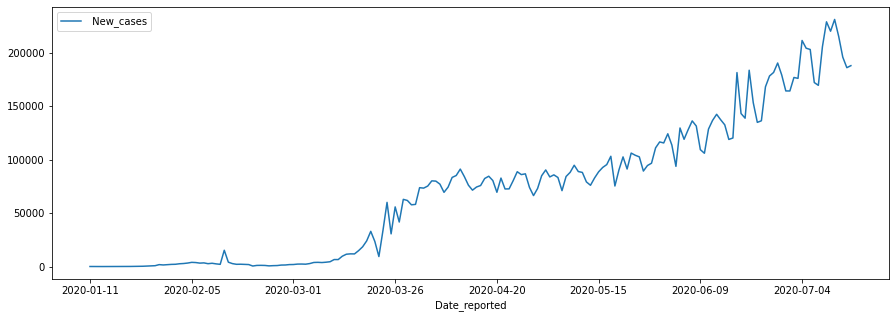

In [ ]:
#plt.figure(figsize=(15,5))
#plt.bar(covid_global.index, covid_global[" New_cases"], color = "r", label = "No. of New Covid Cases")
#plt.title("Covid cases globally")
#plt.xticks(rotation = 100)
#plt.tick_params(axis='x', pad=10)
#plt.legend()
covid_global.plot(y=' New_cases', figsize=(15,5))
#plt.xlabel("Date")
#plt.ylabel("No.of Cases")
#plt.show()

In [ ]:
# Here goes Stock Indices Data Graphs 

### Correlation

##Heatmap of all stocks

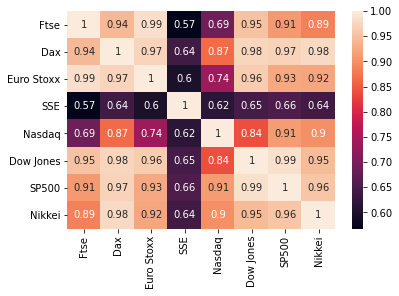

In [ ]:
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('allStocks2.csv')
corr = (df.dropna()).corr()
sns.heatmap(corr, annot =True)

### Reading the stocks from File

              Ftse           Dax  ...        SP500        Nikkei
count   165.000000    163.000000  ...   165.000000    160.000000
mean   6668.024848  12084.988957  ...  3029.512848  21845.078375
std     806.928866   1440.751348  ...   252.290016   2017.090211
min    4993.900000   8441.710000  ...  2237.400000  16552.830000
25%    5939.700000  10777.450000  ...  2874.560000  20109.665000
50%    6796.400000  12617.990000  ...  3094.040000  22609.585000
75%    7416.400000  13246.015000  ...  3223.380000  23402.810000
max    7674.600000  13789.000000  ...  3386.150000  24083.510000

[8 rows x 8 columns]


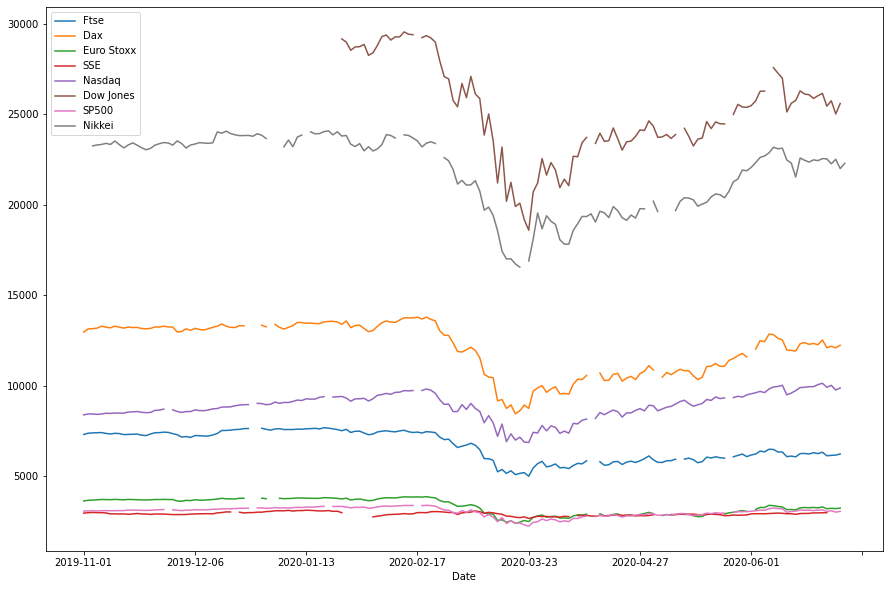

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("allStocks2.csv")
df = df.set_index('Date')
df.plot(figsize=(15,10))
print(df.describe())


##Showing a Moving Average of the stocks

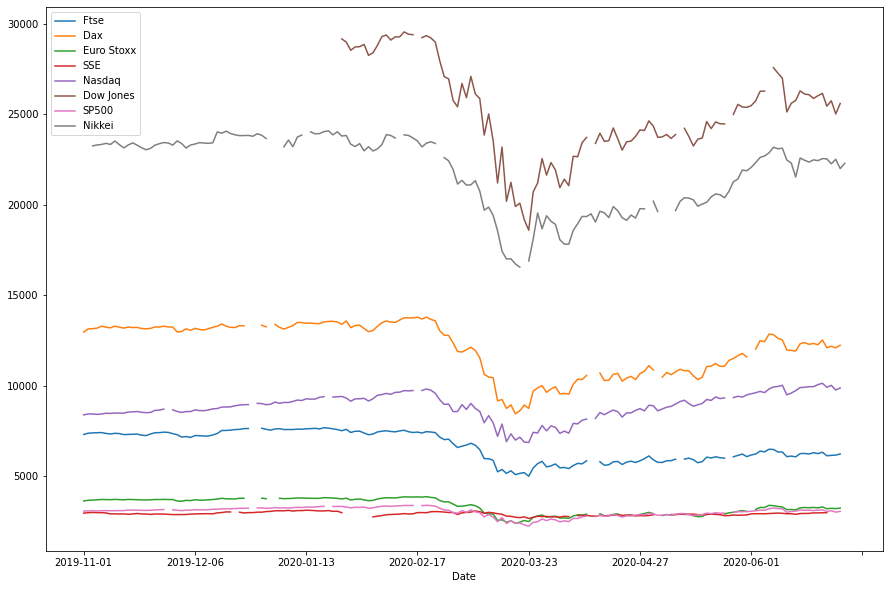

In [ ]:
days =50 #average of the first fifty rows
df.rolling(days).mean()
df.plot(figsize=(15,10))

## Stock Data vs Covid Data Plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
def stock(ticker):
    country_stock = yf.Ticker(ticker).history(period="1y")
    country_stock_close = country_stock[['Close']]
    return country_stock_close

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=be215b108a9f8bb3028014633686092bb6087b0162c322a891dc56a45a1a7dfe
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:

covid_data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")
covid_data.index = covid_data["Date_reported"]
covid_data = covid_data[[" Country", " New_cases", " New_deaths"]]
for i in covid_data[" New_cases"]:
    if (i<0):
        covid_data = covid_data.replace(i, 0)
    


def covid(country):
    is_country = covid_data[' Country']== country
    covid_data_country = covid_data[is_country]
    return covid_data_country

In [ ]:

def visual(ticker, country, country_stock):
    
    country_stock_close = stock(ticker)
    covid_data_country = covid(country)
    
    stock_covid = country_stock_close.join(covid_data_country)
    plt.figure(figsize=(15,5))
    plt.plot(stock_covid.index, stock_covid["Close"], label = "Close Stock Price")
    plt.plot(stock_covid.index, stock_covid[" New_cases"], label = "No. of New Covid Cases")
    plt.plot(stock_covid.index, stock_covid[" New_deaths"], label = "No. of New Covid Deaths")
    plt.title("Covid versus " + country_stock + " Stock")
    #country_stock_join.plot(kind="line", subplots=True, sharex=True, sharey=False)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Stock Price/No.of Cases")
    #plt.figure(figsize=(15,5))
    plt.show()

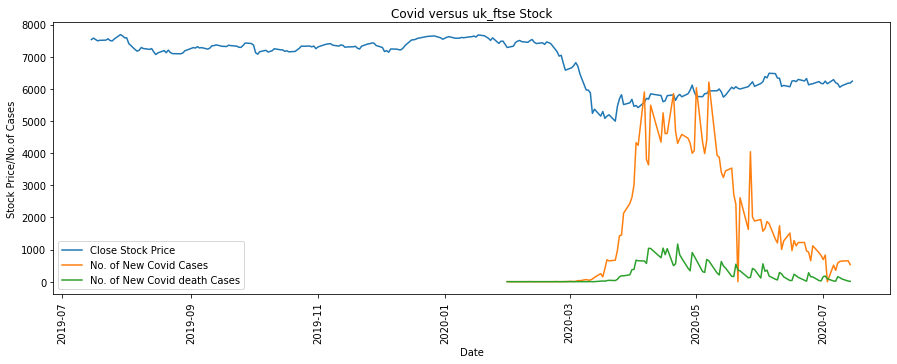

In [ ]:
visual("^FTSE", "The United Kingdom", "uk_ftse")